<a href="https://colab.research.google.com/github/howard1028/Advance_machine_learning/blob/main/hw1_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import division
from sympy import *
import torch
import torch.nn as nn
from torch.optim import optimizer
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 0) prepare data
x = np.empty((0))
y = np.empty((0))
csv_file = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/進階機器學習/HW1-1.csv', delimiter=',', skip_header = 1)
csv_file = csv_file.tolist()
csv_file.sort(key = lambda l:l[0])
csv_file = np.array(csv_file)

for data in csv_file: # 逐筆放入陣列中
    x = np.append(x, float(data[0]))
    y = np.append(y, float(data[1]))

tensor_x = torch.tensor(x, dtype=torch.float32) # 將 numpy array 轉化成 tensor
tensor_y = torch.tensor(y, dtype=torch.float32)
tensor_x = tensor_x.view(tensor_x.shape[0], 1)
tensor_y = tensor_y.view(tensor_y.shape[0], 1)


In [7]:
# 1.model
w0 = torch.tensor(-5.0, requires_grad=True)
w1 = torch.tensor(-5.0, requires_grad=True)
w2 = torch.tensor(-5.0, requires_grad=True)
w3 = torch.tensor(-5.0, requires_grad=True)

def forward(X):
    return w0 + (w1 * X) + (w2 * X**2) + (w3 * X**3)


# 2) 設定相關參數
learning_rate = 0.01 # learning rate
criterion = nn.MSELoss() # loss function

Epoch: [1/50], Iteration: [100/500], loss: 2246.019
Epoch: [1/50], Iteration: [200/500], loss: 136.033
Epoch: [1/50], Iteration: [300/500], loss: 36.372
Epoch: [1/50], Iteration: [400/500], loss: 18.400
Epoch: [1/50], Iteration: [500/500], loss: 13.068
Epoch: [2/50], Iteration: [100/500], loss: 10.379
Epoch: [2/50], Iteration: [200/500], loss: 8.524
Epoch: [2/50], Iteration: [300/500], loss: 7.108
Epoch: [2/50], Iteration: [400/500], loss: 5.997
Epoch: [2/50], Iteration: [500/500], loss: 5.118
Epoch: [3/50], Iteration: [100/500], loss: 4.418
Epoch: [3/50], Iteration: [200/500], loss: 3.858
Epoch: [3/50], Iteration: [300/500], loss: 3.407
Epoch: [3/50], Iteration: [400/500], loss: 3.042
Epoch: [3/50], Iteration: [500/500], loss: 2.743
Epoch: [4/50], Iteration: [100/500], loss: 2.497
Epoch: [4/50], Iteration: [200/500], loss: 2.292
Epoch: [4/50], Iteration: [300/500], loss: 2.119
Epoch: [4/50], Iteration: [400/500], loss: 1.972
Epoch: [4/50], Iteration: [500/500], loss: 1.846
Epoch: [5/5

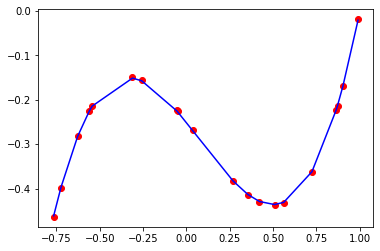

In [8]:

# 3) training loop
epochs = 50
training_time = 500
for epoch in range(epochs):
    running_loss = 0.0

    for time in range(training_time):
        # forward pass and loss
        y_predicted = forward(tensor_x)
        loss = criterion(y_predicted, tensor_y)

        # backward pass
        loss.backward()
        
        # 計算loss
        running_loss += loss.item()

        if(time % 100 == 99):
            print("Epoch: [%d/%d], Iteration: [%s/%s], loss: %.3f" % (epoch+1, epochs, time+1, training_time, running_loss))
            running_loss = 0

        # 藉由每次訓練去更新 X 的係數
        w0.data = w0.data - learning_rate * w0.grad.data
        w1.data = w1.data - learning_rate * w1.grad.data
        w2.data = w2.data - learning_rate * w2.grad.data
        w3.data = w3.data - learning_rate * w3.grad.data

        # 歸零 X 係數的梯度
        w0.grad.data.zero_()
        w1.grad.data.zero_()
        w2.grad.data.zero_()
        w3.grad.data.zero_()


# 印出結果
print("w0 =", round(float(w0), 3))
print("w1 =", round(float(w1), 3))
print("w2 =", round(float(w2), 3))
print("w3 =", round(float(w3), 3))

def diff(X):
    return float(w1 + 2 *(w2 * X) + 3 *(w3 * X**2))

print("f'(3.0) = ", round(diff(float(3.0)), 3))
print("f'(0.1) = ", round(diff(float(0.1)), 3))
print("f'(-0.5) = ", round(diff(float(-0.5)), 3))

predicted = forward(tensor_x).detach().numpy()
plt.plot(tensor_x, tensor_y, 'ro')
plt.plot(tensor_x, predicted, 'b')
plt.show()